In [1]:
import pandas as pd 
import numpy as np
import warnings
from tqdm import tqdm

In [2]:
df_validData = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/Complete_Data_AngularV.cvs")

In [3]:
columns_to_drop = [
    'Unnamed: 0', 'index',
    'handLeftPosition.x', 'handLeftPosition.y', 'handLeftPosition.z',
    'handLeftRotation.x', 'handLeftRotation.y', 'handLeftRotation.z',
    'handLeftScale.x', 'handLeftScale.y', 'handLeftScale.z',
    'handLeftDirectionForward.x', 'handLeftDirectionForward.y', 'handLeftDirectionForward.z',
    'handLeftDirectionRight.x', 'handLeftDirectionRight.y', 'handLeftDirectionRight.z',
    'handLeftDirectionUp.x', 'handLeftDirectionUp.y', 'handLeftDirectionUp.z',
    'handRightPosition.x', 'handRightPosition.y', 'handRightPosition.z',
    'handRightRotation.x', 'handRightRotation.y', 'handRightRotation.z',
    'handRightScale.x', 'handRightScale.y', 'handRightScale.z',
    'handRightDirectionForward.x', 'handRightDirectionForward.y', 'handRightDirectionForward.z',
    'handRightDirectionRight.x', 'handRightDirectionRight.y', 'handRightDirectionRight.z',
    'handRightDirectionUp.x', 'handRightDirectionUp.y', 'handRightDirectionUp.z',
    'ordinalOfHit', 'Continuous_Time' , 'Unnamed: 0.2',
]

# Drop only if columns exist
df_validData_small = df_validData.drop(columns=[col for col in columns_to_drop if col in df_validData.columns])

In [4]:
def insert_missing_openers_safely(df):
    df = df.reset_index(drop=True).copy()
    if 'was_inserted' not in df.columns:
        df['was_inserted'] = False  # Initialize the flag

    new_rows = []
    stack = []
    event_col = 'events'

    for i, val in enumerate(df[event_col]):
        if val in [1.0, 2.0]:
            stack.append((val, i))  # Opener

        elif val in [-1.0, -2.0]:
            if stack:
                last_val, _ = stack[-1]
                if last_val + val == 0:
                    stack.pop()
                    continue

            # No opener → create a duplicate row with flipped event and tag as inserted
            new_row = df.iloc[i].copy()
            new_row[event_col] = abs(val)
            new_row['was_inserted'] = True
            new_rows.append((i, new_row))

    for offset, (idx, row) in enumerate(new_rows):
        df = pd.concat([
            df.iloc[:idx + offset],
            pd.DataFrame([row]),
            df.iloc[idx + offset:]
        ], ignore_index=True)

    return df

In [5]:
def insert_missing_openers_grouped(df):
    grouped = df.groupby(['SubjectID', 'Session', 'SessionSubsection'], sort=False)
    
    fixed_chunks = []
    for _, group in tqdm(grouped, total=grouped.ngroups, desc="Inserting missing openers"):
        group_sorted = group.sort_values('timeStampDataPointEnd')  # Or your preferred timestamp column
        fixed_group = insert_missing_openers_safely(group_sorted)
        fixed_chunks.append(fixed_group)
    
    return pd.concat(fixed_chunks, ignore_index=True)


In [6]:
fixed_df_complete = insert_missing_openers_grouped(df_validData_small)


Inserting missing openers: 100%|██████████████| 420/420 [07:44<00:00,  1.11s/it]


In [7]:
fixed_df_complete.head(40)

SubjectID  Session  SessionSubsection  timeStampDataPointEnd  \
0         365        1                  1           1.635519e+09   
1         365        1                  1           1.635519e+09   
2         365        1                  1           1.635519e+09   
3         365        1                  1           1.635519e+09   
4         365        1                  1           1.635519e+09   
5         365        1                  1           1.635519e+09   
6         365        1                  1           1.635519e+09   
7         365        1                  1           1.635519e+09   
8         365        1                  1           1.635519e+09   
9         365        1                  1           1.635519e+09   
10        365        1                  1           1.635519e+09   
11        365        1                  1           1.635519e+09   
12        365        1                  1           1.635519e+09   
13        365        1                  1           1.635519e+09   
14        365        1                  1           1.635519e+09   
15        365        1                  1           1.635519e+09   
16        365        1                  1           1.635519e+09   
17        365        1                  1           1.635519e+09   
18        365        1                  1           1.635519e+09   
19        365        1                  1           1.635519e+09   
20        365        1                  1           1.635519e+09   
21        365        1                  1           1.635519e+09   
22        365        1                  1           1.635519e+09   
23        365        1                  1           1.635519e+09   
24        365        1                  1           1.635519e+09   
25        365        1                  1           1.635519e+09   
26        365        1                  1           1.635519e+09   
27        365        1                  1           1.635519e+09   
28        365        1                  1           1.635519e+09   
29        365        1                  1           1.635519e+09   
30        365        1                  1           1.635519e+09   
31        365        1                  1           1.635519e+09   
32        365        1                  1           1.635519e+09   
33        365        1                  1           1.635519e+09   
34        365        1                  1           1.635519e+09   
35        365        1                  1           1.635519e+09   
36        365        1                  1           1.635519e+09   
37        365        1                  1           1.635519e+09   
38        365        1                  1           1.635519e+09   
39        365        1                  1           1.635519e+09   

    eyeOpennessLeft  eyeOpennessRight  pupilDiameterMillimetersLeft  \
0               1.0               1.0                      3.333588   
1               1.0               1.0                      3.291748   
2               1.0               1.0                      3.291748   
3               1.0               1.0                      3.259613   
4               1.0               1.0                      3.259613   
5               1.0               1.0                      3.207932   
6               1.0               1.0                      3.184616   
7               1.0               1.0                      3.166901   
8               1.0               1.0                      3.149246   
9               1.0               1.0                      3.144104   
10              1.0               1.0                      3.140427   
11              1.0               1.0                      3.088455   
12              1.0               1.0                      3.088455   
13              1.0               1.0                      3.013062   
14              1.0               1.0                      2.998276   
15              1.0               1.0                      2.998276   
16      

In [8]:
fixed_df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16033792 entries, 0 to 16033791
Data columns (total 88 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   SubjectID                      int64  
 1   Session                        int64  
 2   SessionSubsection              int64  
 3   timeStampDataPointEnd          float64
 4   eyeOpennessLeft                float64
 5   eyeOpennessRight               float64
 6   pupilDiameterMillimetersLeft   float64
 7   pupilDiameterMillimetersRight  float64
 8   leftGazeValidityBitmask        int64  
 9   rightGazeValidityBitmask       int64  
 10  combinedGazeValidityBitmask    int64  
 11  rayCastHitsLeftEye             object 
 12  rayCastHitsRightEye            object 
 13  eyePositionCombinedWorld.x     float64
 14  eyePositionCombinedWorld.y     float64
 15  eyePositionCombinedWorld.z     float64
 16  eyeDirectionCombinedWorld.x    float64
 17  eyeDirectionCombinedWorld.y    float64
 18  

In [9]:
fixed_df_complete.events.value_counts()

events
 2.0    815367
 1.0    814875
-2.0    814504
-1.0    814407
Name: count, dtype: int64

In [10]:
# Initialize the column
df_validData['long_events'] = np.nan

### --- FIXATIONS (events == -2.0) ---
fixations = df_validData[df_validData['events'] == -2.0].copy()

# Step 1: Compute MAD-based z-scores
fix_median = np.nanmedian(fixations['length'])
fix_mad = np.nanmedian(np.abs(fixations['length'] - fix_median))
fix_std_approx = fix_mad * 1.4826

# Step 2: Z-score and flag
fixations['FixDur_mad_z'] = np.abs(fixations['length'] - fix_median) / fix_std_approx
fixations['Outlier_FixDur'] = np.where(fixations['FixDur_mad_z'] > 3.5, 'Out', 'Stays')
fixations['long_events'] = np.where(fixations['Outlier_FixDur'] == 'Stays', 1, np.nan)

# Assign back
df_validData.loc[fixations.index, 'long_events'] = fixations['long_events']

### --- SACCADES (events == -1.0) ---
saccades = df_validData[df_validData['events'] == -1.0].copy()

# Step 1: MAD z-score
sacc_median = np.nanmedian(saccades['length'])
sacc_mad = np.nanmedian(np.abs(saccades['length'] - sacc_median))
sacc_std_approx = sacc_mad * 1.4826

# Step 2: Z-score and flag
saccades['SaccDur_mad_z'] = np.abs(saccades['length'] - sacc_median) / sacc_std_approx
saccades['Outlier_SaccDur'] = np.where(saccades['SaccDur_mad_z'] > 3.5, 'Out', 'Stays')
saccades['long_events'] = np.where(saccades['Outlier_SaccDur'] == 'Stays', 1, np.nan)

# Assign back
df_validData.loc[saccades.index, 'long_events'] = saccades['long_events']


In [11]:
def compute_centroid(df, columns):
    return df[columns].mean().values

def compute_saccade_amplitude(prev_gaze_centroid, prev_subject_centroid, gaze_centroid, subject_centroid):
    v_eye_vec = gaze_centroid - prev_gaze_centroid 
    eye_vec = prev_gaze_centroid - prev_subject_centroid
    eye_vec = eye_vec / np.linalg.norm(eye_vec)
    projection = np.dot(v_eye_vec, eye_vec) * eye_vec
    v_eye_inplane = np.linalg.norm(v_eye_vec - projection)
    sacc_amplitude = np.arctan2(v_eye_inplane, np.linalg.norm(prev_subject_centroid - prev_gaze_centroid))
    return np.degrees(sacc_amplitude)

def process_saccades(for_eye):
    for_eye = for_eye.copy()
    for_eye['saccade_amplitude'] = np.nan
    for_eye['peak_velocity'] = np.nan

    fixation_starts = for_eye[for_eye['events'] == 2.0].index
    fixation_ends = for_eye[for_eye['events'] == -2.0].index

    if len(fixation_starts) == 0 or len(fixation_ends) == 0:
        return pd.DataFrame()

    if fixation_ends[0] < fixation_starts[0]:
        fixation_ends = fixation_ends[1:]
    if len(fixation_starts) > len(fixation_ends):
        fixation_starts = fixation_starts[:len(fixation_ends)]

    fixations = list(zip(fixation_starts, fixation_ends))
    if len(fixations) < 2:
        return pd.DataFrame()

    # Progress bar here
    for i in tqdm(range(1, len(fixations)), desc="Fixation Pairs", leave=False):
        (prev_start, prev_end) = fixations[i - 1]
        (curr_start, curr_end) = fixations[i]

        prev_fix = for_eye.loc[prev_start:prev_end]
        curr_fix = for_eye.loc[curr_start:curr_end]

        prev_gaze_centroid = compute_centroid(prev_fix, ['hitPointOnObject_x', 'hitPointOnObject_y', 'hitPointOnObject_z'])
        prev_subject_centroid = compute_centroid(prev_fix, ['eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z'])

        curr_gaze_centroid = compute_centroid(curr_fix, ['hitPointOnObject_x', 'hitPointOnObject_y', 'hitPointOnObject_z'])
        curr_subject_centroid = compute_centroid(curr_fix, ['eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z'])

        amp = compute_saccade_amplitude(prev_gaze_centroid, prev_subject_centroid, curr_gaze_centroid, curr_subject_centroid)

        saccade_onset = for_eye[(for_eye.index > prev_end) & (for_eye.index < curr_start) & (for_eye['events'] == 1.0)]
        if not saccade_onset.empty:
            for_eye.loc[saccade_onset.index, 'saccade_amplitude'] = amp

    # Same for velocity (no need to add another progress bar unless necessary)
    saccade_starts = for_eye[for_eye['events'] == 1.0].index
    saccade_ends = for_eye[for_eye['events'] == -1.0].index

    if len(saccade_starts) > 0 and len(saccade_ends) > 0:
        if saccade_ends[0] < saccade_starts[0]:
            saccade_ends = saccade_ends[1:]
    if len(saccade_starts) > len(saccade_ends):
        saccade_starts = saccade_starts[:len(saccade_ends)]

    for start, end in zip(saccade_starts, saccade_ends):
        sacc_segment = for_eye.loc[start:end]
        try:
            peak = np.nanmax(sacc_segment['combined_vel'].values)
            for_eye.loc[start, 'peak_velocity'] = peak
        except ValueError:
            continue

    return for_eye[for_eye['events'] == 1.0][['SubjectID', 'Session', 'SessionSubsection', 'saccade_amplitude', 'peak_velocity']]


In [21]:
fixed_df_complete.head()

SubjectID  Session  SessionSubsection  timeStampDataPointEnd  \
0        365        1                  1           1.635519e+09   
1        365        1                  1           1.635519e+09   
2        365        1                  1           1.635519e+09   
3        365        1                  1           1.635519e+09   
4        365        1                  1           1.635519e+09   

   eyeOpennessLeft  eyeOpennessRight  pupilDiameterMillimetersLeft  \
0              1.0               1.0                      3.333588   
1              1.0               1.0                      3.291748   
2              1.0               1.0                      3.291748   
3              1.0               1.0                      3.259613   
4              1.0               1.0                      3.259613   

   pupilDiameterMillimetersRight  leftGazeValidityBitmask  \
0                       3.785751                       31   
1                       3.744843                       31   
2                       3.744843                       31   
3                       3.707169                       31   
4                       3.707169                       31   

   rightGazeValidityBitmask  ...     thresh      isFix corrected_vel  events  \
0                        31  ...  44.460563        NaN           NaN     NaN   
1                        31  ...  44.460563   0.000000           NaN     2.0   
2                        31  ...  44.460563   0.000000           NaN     NaN   
3                        31  ...  44.460563  73.369491           NaN     NaN   
4                        31  ...  44.460563   0.642210       0.64221     NaN   

     length   distance   avg_dist         names  Collider_CategoricalN  \
0       NaN        NaN        NaN  Building_161               Building   
1  0.672079  63.996796  63.996938  Building_161               Building   
2  0.672079  63.996796  63.996938  Building_161               Building   
3  0.672079  63.997106  63.996938  Building_161               Building   
4  0.672079  63.997107  63.996938  Building_161               Building   

   was_inserted  
0         False  
1         False  
2         False  
3         False  
4         False  

[5 rows x 88 columns]

In [ ]:
# Apply to full dataset by group
saccade_results = (
     fixed_df_complete.groupby(['SubjectID', 'Session', 'SessionSubsection'], group_keys=False)
    .apply(process_saccades)
    .reset_index(drop=True)
)


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_4991/3319916128.py:68: RuntimeWarning: All-NaN slice encountered
  peak = np.nanmax(sacc_segment['combined_vel'].values)
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_4991/3319916128.py:68: RuntimeWarning: All-NaN slice encountered
  peak = np.nanmax(sacc_segment['combined_vel'].values)
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_4991/3319916128.py:68: RuntimeWarning: All-NaN slice encountered
  peak = np.nanmax(sacc_segment['combined_vel'].values)
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_4991/3319916128.py:68: RuntimeWarning: All-NaN slice encountered
  peak = np.nanmax(sacc_segment['combined_vel'].values)
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_4991/3319916128.py:68: RuntimeWarning: All-NaN slice encountered
  peak = np.nanmax(sacc_segment['combined_vel'].values)
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_4991/3319916128.py:68: RuntimeWarning: Al

In [23]:
saccade_results[saccade_results.peak_velocity > 1000].shape[0] / saccade_results.shape[0]

0.0698548857186685

In [24]:
saccade_results_filtered = saccade_results[(saccade_results.peak_velocity < 1000) & (saccade_results.saccade_amplitude < 70)]

In [ ]:
saccade_results_filtered.head()

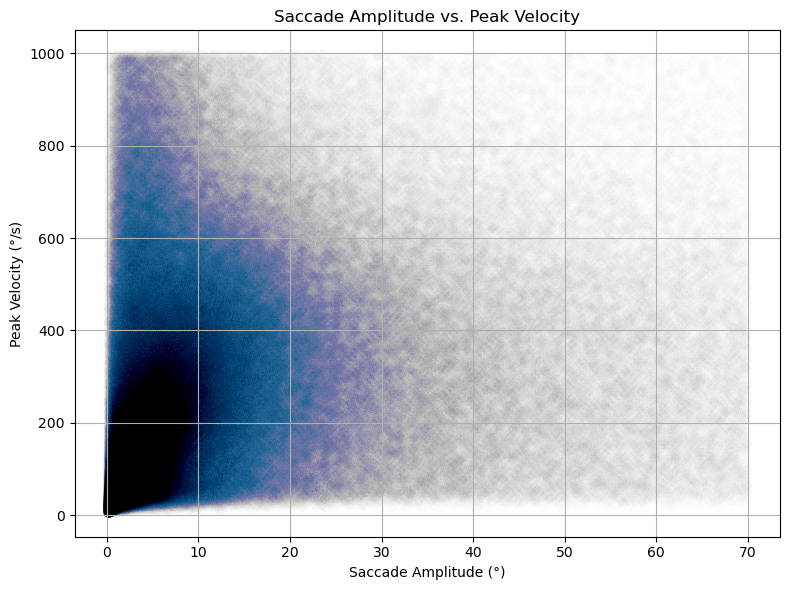

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter valid rows
df_plot = saccade_results_filtered.dropna(subset=['saccade_amplitude', 'peak_velocity'])



# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x='saccade_amplitude',
    y='peak_velocity',
    alpha=0.002,
    edgecolor='black'
)

# Labels and formatting
plt.xlabel('Saccade Amplitude (°)')
plt.ylabel('Peak Velocity (°/s)')
plt.title('Saccade Amplitude vs. Peak Velocity')
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
saccade_results_filtered.head()

SubjectID  Session  SessionSubsection  saccade_amplitude  peak_velocity
0        365        1                  1           2.299319     616.879190
1        365        1                  1          19.153742     373.703246
2        365        1                  1           0.582218      45.704280
3        365        1                  1           2.030522     942.109209
4        365        1                  1          44.843960     278.667164

In [26]:
# Save fixations
saccade_results_filtered.to_csv("/Volumes/TwoTeras/PCA/Data_Sets/Experiment_1/saccade_results_filtered.csv", index=False)

In [28]:
def compute_saccade_amplitude_summary(df, id_col='SubjectID', val_col='saccade_amplitude'):
    """
    Compute median, IQR, and Bowley coefficient of saccade amplitude per subject.
    Also includes number of data points per subject.
    """
    # Drop missing amplitude values
    df = df.dropna(subset=[val_col])

    # Compute basic statistics
    summary = (
        df.groupby(id_col)
        .agg(
            N=('saccade_amplitude', 'count'),
            Q25=(val_col, lambda x: np.nanquantile(x, 0.25)),
            Median=(val_col, np.nanmedian),
            Q75=(val_col, lambda x: np.nanquantile(x, 0.75)),
            Max=(val_col, np.nanmax),
            SD=(val_col, np.nanstd),
            Mean=(val_col, np.nanmean),
        )
        .reset_index()
    )

    # Compute spread and skew
    summary['DistQ1_Q3'] = summary['Q75'] - summary['Q25']
    summary['BowleyCoef'] = (summary['Q75'] + summary['Q25'] - 2 * summary['Median']) / summary['DistQ1_Q3']

    # Rename and clean up
    summary = summary.rename(columns={
        'Median': 'SaccadeAmp_med',
        'DistQ1_Q3': 'SaccadeAmp_DistQ1_Q3',
        'BowleyCoef': 'SaccadeAmp_bowleyCoef',
        'Mean': 'SaccadeAmp_mean',
        'SD': 'SaccadeAmp_sd',
        'Max': 'SaccadeAmp_max'
    }).drop(columns=['Q25', 'Q75'])

    return summary


In [29]:
df_saccade_summary = compute_saccade_amplitude_summary(saccade_results_filtered)


/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_4991/1245060488.py:12: FutureWarning: The provided callable <function nanmedian at 0x1162698a0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  .agg(
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_4991/1245060488.py:12: FutureWarning: The provided callable <function nanmax at 0x116268cc0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  .agg(
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_4991/1245060488.py:12: FutureWarning: The provided callable <function nanstd at 0x116269f80> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  .agg(
/

In [32]:
df_saccade_summary.columns

Index(['SubjectID', 'N', 'SaccadeAmp_med', 'SaccadeAmp_max', 'SaccadeAmp_sd',
       'SaccadeAmp_mean', 'SaccadeAmp_DistQ1_Q3', 'SaccadeAmp_bowleyCoef'],
      dtype='object')

In [37]:
df_saccade_summary_filtered = (
    df_saccade_summary[
        ['SubjectID','SaccadeAmp_med', 'SaccadeAmp_DistQ1_Q3', 'SaccadeAmp_bowleyCoef']
    ]
    .rename(columns={
        'SaccadeAmp_med': 'Saccade_Amplitud_med',
        'SaccadeAmp_DistQ1_Q3': 'Saccade_Amplitud_DistQ1-Q3',
        'SaccadeAmp_bowleyCoef': 'Saccade_Amplitud_bowleyCoef'
    })
)


In [38]:
df_saccade_summary_filtered.to_csv("/Volumes/TwoTeras/PCA/Data_Sets/Experiment_1/saccade_summary.csv", index=False) 


In [ ]:
# Copy the raw data
df = saccade_results_filtered.copy()

# Drop NaNs in amplitude (important!)
df = df.dropna(subset=['saccade_amplitude'])

# Sort within each subject to track visual exploration order
df = df.sort_values(by=['SubjectID', 'Session', 'SessionSubsection']).reset_index(drop=True)

# Container for result rows
rows = []

# Group by Subject
for sid, df_sub in df.groupby('SubjectID'):
    amplitudes = df_sub['saccade_amplitude'].values
    
    # Overall stats
    dist_mean = np.mean(amplitudes)
    dist_sd = np.std(amplitudes)
    dist_max = np.max(amplitudes)
    
    # Determine quartile splits
    n = len(amplitudes)
    q1 = amplitudes[:int(0.25 * n)]
    q2 = amplitudes[int(0.25 * n):int(0.50 * n)]
    q3 = amplitudes[int(0.50 * n):int(0.75 * n)]
    q4 = amplitudes[int(0.75 * n):]

    row = {
        'number_of_steps': len(amplitudes),
        'SubjectID': sid,
        'dist_mean': dist_mean,
        'dist_sd': dist_sd,
        'dist_max': dist_max,

        'dist_mean25_1': np.mean(q1) if len(q1) else np.nan,
        'dist_sd25_1': np.std(q1) if len(q1) else np.nan,
        'dist_max25_1': np.max(q1) if len(q1) else np.nan,

        'dist_mean25_2': np.mean(q2) if len(q2) else np.nan,
        'dist_sd25_2': np.std(q2) if len(q2) else np.nan,
        'dist_max25_2': np.max(q2) if len(q2) else np.nan,

        'dist_mean25_3': np.mean(q3) if len(q3) else np.nan,
        'dist_sd25_3': np.std(q3) if len(q3) else np.nan,
        'dist_max25_3': np.max(q3) if len(q3) else np.nan,

        'dist_mean25_4': np.mean(q4) if len(q4) else np.nan,
        'dist_sd25_4': np.std(q4) if len(q4) else np.nan,
        'dist_max25_4': np.max(q4) if len(q4) else np.nan,
    }

    rows.append(row)

# Build final dataframe
df_step_summary = pd.DataFrame(rows)


In [ ]:
df_step_summary.tail()

In [ ]:


def vector_angle_deg(v1, v2):
    v1 = v1 / np.linalg.norm(v1)
    v2 = v2 / np.linalg.norm(v2)
    dot = np.clip(np.dot(v1, v2), -1.0, 1.0)
    return np.degrees(np.arccos(dot))

def compute_fixation_dispersion(fix_df):
    gaze_vecs = fix_df[['hitPointOnObject_x', 'hitPointOnObject_y', 'hitPointOnObject_z']].values \
              - fix_df[['eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z']].values
    if len(gaze_vecs) < 2:
        return np.nan
    gaze_center = np.mean(gaze_vecs, axis=0)
    gaze_center /= np.linalg.norm(gaze_center)
    angles = [vector_angle_deg(v, gaze_center) for v in gaze_vecs if np.linalg.norm(v) > 0]
    return np.std(angles)

def extract_fixation_metrics(df):
    results = []

    for subject in tqdm(df['SubjectID'].unique(), desc="Subjects"):
        df_subj = df[df['SubjectID'] == subject]

        for session in df_subj['Session'].unique():
            df_ses = df_subj[df_subj['Session'] == session]

            for subsection in df_ses['SessionSubsection'].unique():
                df_part = df_ses[df_ses['SessionSubsection'] == subsection].sort_values(by='timeStampDataPointEnd')

                starts = df_part[df_part['events'] == 2.0].index
                ends = df_part[df_part['events'] == -2.0].index

                if len(starts) == 0 or len(ends) == 0:
                    continue
                if ends[0] < starts[0]:
                    ends = ends[1:]
                if len(starts) > len(ends):
                    starts = starts[:len(ends)]

                for i, (start, end) in enumerate(zip(starts, ends)):
                    fixation = df_part.loc[start:end]
                    if fixation.empty:
                        continue
                    dispersion_deg = compute_fixation_dispersion(fixation)
                    peak_velocity = np.nanmax(fixation['combined_vel'].values)
                    results.append({
                        'SubjectID': subject,
                        'Session': session,
                        'SessionSubsection': subsection,
                        'FixationIndex': i,
                        'FixationDispersion_deg': dispersion_deg,
                        'FixationPeakVelocity': peak_velocity
                    })

    return pd.DataFrame(results)


In [ ]:
df_disp = extract_fixation_metrics(fixed_df_complete)
df_disp.head()

In [ ]:
# Filter valid rows
df_plot = df_disp.dropna(subset=['FixationDispersion_deg', 'FixationPeakVelocity'])



# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot[(df_plot.FixationPeakVelocity < 1000) & (df_plot.FixationDispersion_deg < 10)],
    x='FixationDispersion_deg',
    y='FixationPeakVelocity',
    alpha=0.002,
    edgecolor='black'
)

# Labels and formatting
plt.xlabel('Fixation Amplitude (°)')
plt.ylabel('Peak Velocity (°/s)')
plt.title('Fixation Amplitude vs. Peak Velocity')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd

def compute_saccadic_flips(df, angle_threshold_deg=5):
    """
    Computes horizontal and vertical direction flips (≥ threshold) in degrees,
    occurring during saccades (between fixations), grouped by SubjectID, Session, and SessionSubsection.
    
    Parameters:
    - df: DataFrame with gaze data. Must include columns:
        'events', 'SubjectID', 'Session', 'SessionSubsection',
        'hitPointOnObject_[x,y,z]', 'eyePositionCombinedWorld.[x,y,z]', 'timeStampDataPointEnd'.
    - angle_threshold_deg: minimum angular movement before a sign change counts as a flip (default: 5°).
    
    Returns:
    - DataFrame with number of flips per subject/session/subsection.
    """
    results = []

    grouped = df.groupby(['SubjectID', 'Session', 'SessionSubsection'])
    group_keys = list(grouped.groups.keys())

    for subj, sess, part in tqdm(group_keys, desc="Computing flips", leave=True):
        group = grouped.get_group((subj, sess, part)).sort_values('timeStampDataPointEnd')

        fix_starts = group[group['events'] == 2].index
        fix_ends = group[group['events'] == -2].index

        if len(fix_starts) == 0 or len(fix_ends) == 0:
            continue
        if fix_ends[0] < fix_starts[0]:
            fix_ends = fix_ends[1:]
        if len(fix_starts) > len(fix_ends):
            fix_starts = fix_starts[:len(fix_ends)]

        horiz_flips_total = 0
        vert_flips_total = 0

        for (prev_end, next_start) in zip(fix_ends[:-1], fix_starts[1:]):
            saccade_segment = group.loc[prev_end:next_start]

            gaze_vec = (
                saccade_segment[['hitPointOnObject_x', 'hitPointOnObject_y', 'hitPointOnObject_z']].values -
                saccade_segment[['eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z']].values
            )

            norms = np.linalg.norm(gaze_vec, axis=1, keepdims=True)
            unit_vecs = gaze_vec / np.clip(norms, a_min=1e-8, a_max=None)

            horiz_angles = np.degrees(np.arctan2(unit_vecs[:, 0], unit_vecs[:, 2]))
            vert_angles = np.degrees(np.arcsin(np.clip(unit_vecs[:, 1], -1, 1)))

            if len(horiz_angles) < 3:
                continue

            horiz_diff = np.diff(horiz_angles)
            vert_diff = np.diff(vert_angles)

            horiz_flips = np.sum((np.sign(horiz_diff[1:]) != np.sign(horiz_diff[:-1])) &
                                 (np.abs(horiz_diff[:-1]) >= angle_threshold_deg))

            vert_flips = np.sum((np.sign(vert_diff[1:]) != np.sign(vert_diff[:-1])) &
                                (np.abs(vert_diff[:-1]) >= angle_threshold_deg))

            horiz_flips_total += horiz_flips
            vert_flips_total += vert_flips

        results.append({
            'SubjectID': subj,
            'Session': sess,
            'SessionSubsection': part,
            'SaccadicHorizontalFlips': horiz_flips_total,
            'SaccadicVerticalFlips': vert_flips_total
        })

    return pd.DataFrame(results)


In [ ]:
Thousend_lines = fixed_df_complete.tail(1000).copy()

In [ ]:
Thousend_lines_Flips = compute_saccadic_flips(Thousend_lines)

In [ ]:
Thousend_lines_Flips.head()

In [ ]:
df_saccadic_flips = compute_saccadic_flips(fixed_df_complete)


In [ ]:
df_saccadic_flips

In [ ]:
df_saccadic_flips

In [ ]:
df_total_flips = df_saccadic_flips.groupby("SubjectID")[["SaccadicHorizontalFlips", "SaccadicVerticalFlips"]].sum().reset_index()


In [ ]:
df_total_flips

In [ ]:
def plot_gaze_angles_with_flips(df, flip_events, max_points=700):
    df = df.sort_values('timeStampDataPointEnd').reset_index(drop=True).copy()
    df = df.iloc[:max_points]

    fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

    # Plot horizontal angle
    axs[0].plot(df['timeStampDataPointEnd'], df['horiz_angle'], label='Horizontal Angle', color='tab:red')
    axs[0].set_ylabel('Horizontal (°)')
    axs[0].legend()
    axs[0].grid(True)

    # Plot vertical angle
    axs[1].plot(df['timeStampDataPointEnd'], df['vert_angle'], label='Vertical Angle', color='tab:blue')
    axs[1].set_ylabel('Vertical (°)')
    axs[1].set_xlabel('Timestamp')
    axs[1].legend()
    axs[1].grid(True)

    # Overlay flips
    for _, row in flip_events.iterrows():
        ax = axs[0] if row['FlipType'] == 'Horizontal' else axs[1]
        ax.axvline(row['Timestamp'], linestyle='--', color='black', alpha=0.4)

    fig.suptitle("Gaze Angles Over Time with Flip Markers")
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_angle_path_with_flips(df, flip_events, max_points=300):
    df = df.sort_values('timeStampDataPointEnd').reset_index(drop=True).copy()
    df = df.iloc[:max_points]

    plt.figure(figsize=(8, 6))
    plt.plot(df['horiz_angle'], df['vert_angle'], '-o', markersize=3, label='Gaze Path', alpha=0.6)

    for _, row in flip_events.iterrows():
        closest_idx = (df['timeStampDataPointEnd'] - row['Timestamp']).abs().idxmin()
        x = df.loc[closest_idx, 'horiz_angle']
        y = df.loc[closest_idx, 'vert_angle']

        color = 'red' if row['FlipType'] == 'Horizontal' else 'blue'
        plt.scatter(x, y, color=color, s=60, edgecolor='k',
                    label=f"{row['FlipType']} Flip" if row['FlipType'] not in plt.gca().get_legend_handles_labels()[1] else "")

    plt.xlabel("Horizontal Angle (°)")
    plt.ylabel("Vertical Angle (°)")
    plt.title("Gaze Trajectory in Visual Angle Space")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


In [ ]:
 plot_gaze_angles_with_flips(Thousend_lines, flip_events)


In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd

def compute_saccadic_flip_timestamps(df, angle_threshold_deg=5):
    """
    Computes and returns the timestamps of horizontal and vertical flips (≥ threshold) in degrees
    occurring during saccades (between fixations), grouped by SubjectID, Session, and SessionSubsection.

    Returns:
        DataFrame with one row per flip, indicating its type and timestamp.
    """
    flip_events = []

    grouped = df.groupby(['SubjectID', 'Session', 'SessionSubsection'])
    group_keys = list(grouped.groups.keys())

    for subj, sess, part in tqdm(group_keys, desc="Locating flip timestamps", leave=True):
        group = grouped.get_group((subj, sess, part)).sort_values('timeStampDataPointEnd')

        fix_starts = group[group['events'] == 2].index
        fix_ends = group[group['events'] == -2].index

        if len(fix_starts) == 0 or len(fix_ends) == 0:
            continue
        if fix_ends[0] < fix_starts[0]:
            fix_ends = fix_ends[1:]
        if len(fix_starts) > len(fix_ends):
            fix_starts = fix_starts[:len(fix_ends)]

        for (prev_end, next_start) in zip(fix_ends[:-1], fix_starts[1:]):
            saccade_segment = group.loc[prev_end:next_start]
            if len(saccade_segment) < 3:
                continue

            gaze_vec = (
                saccade_segment[['hitPointOnObject_x', 'hitPointOnObject_y', 'hitPointOnObject_z']].values -
                saccade_segment[['eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z']].values
            )
            norms = np.linalg.norm(gaze_vec, axis=1, keepdims=True)
            unit_vecs = gaze_vec / np.clip(norms, a_min=1e-8, a_max=None)

            horiz_angles = np.degrees(np.arctan2(unit_vecs[:, 0], unit_vecs[:, 2]))
            vert_angles  = np.degrees(np.arctan2(unit_vecs[:, 1], unit_vecs[:, 2]))

            # index alignment
            timestamps = saccade_segment['timeStampDataPointEnd'].values
            indices = saccade_segment.index.values

            for axis, angles, flip_label in [('horizontal', horiz_angles, 'Horizontal'),
                                             ('vertical', vert_angles, 'Vertical')]:
                diffs = np.diff(angles)
                signs = np.sign(diffs)

                for i in range(1, len(signs)):
                    sign_change = signs[i] * signs[i - 1] < 0
                    angle_change = abs(diffs[i] - diffs[i - 1]) >= angle_threshold_deg

                    if sign_change and angle_change:
                        flip_idx = indices[i + 1] if i + 1 < len(indices) else indices[-1]
                        flip_time = group.loc[flip_idx, 'timeStampDataPointEnd']

                        flip_events.append({
                            'SubjectID': subj,
                            'Session': sess,
                            'SessionSubsection': part,
                            'FlipType': flip_label,
                            'Timestamp': flip_time
                        })

    return pd.DataFrame(flip_events)


In [ ]:
flips_df = compute_saccadic_flip_timestamps(Thousend_lines)
display(flips_df.head())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gaze_flips_sanity_check(df, idx_start, idx_end, angle_threshold_deg=5):
    """
    Plot gaze angles and mark flip events and fixations for a range of indices in raw eye-tracking data.
    
    Parameters:
    - df: raw eye-tracking DataFrame including 'events', gaze, eye position, and timestamp columns.
    - idx_start: start index for plotting range
    - idx_end: end index for plotting range
    - angle_threshold_deg: minimum angle change to count a flip
    """
    sub = df.iloc[idx_start:idx_end].copy()
    sub.reset_index(drop=True, inplace=True)

    # Compute gaze vector and unit vectors
    gaze_vec = (
        sub[['hitPointOnObject_x', 'hitPointOnObject_y', 'hitPointOnObject_z']].values -
        sub[['eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z']].values
    )
    norms = np.linalg.norm(gaze_vec, axis=1, keepdims=True)
    unit_vecs = gaze_vec / np.clip(norms, a_min=1e-8, a_max=None)

    sub['horiz_angle'] = np.degrees(np.arcsin(np.clip(unit_vecs[:, 0], -1, 1)))
    sub['vert_angle'] = np.degrees(np.arcsin(np.clip(unit_vecs[:, 1], -1, 1)))

    # Detect flips
    horiz_diff = np.diff(sub['horiz_angle'])
    vert_diff = np.diff(sub['vert_angle'])

    horiz_flip_idx = np.where((np.sign(horiz_diff[1:]) * np.sign(horiz_diff[:-1]) < 0) &
                              (np.abs(horiz_diff[1:] - horiz_diff[:-1]) >= angle_threshold_deg))[0] + 1
    vert_flip_idx = np.where((np.sign(vert_diff[1:]) * np.sign(vert_diff[:-1]) < 0) &
                             (np.abs(vert_diff[1:] - vert_diff[:-1]) >= angle_threshold_deg))[0] + 1

    # Plot
    fig, ax = plt.subplots(figsize=(14, 6))
    time = sub['timeStampDataPointEnd']

    ax.plot(time, sub['horiz_angle'], label='Horizontal Angle', alpha=0.7)
    ax.plot(time, sub['vert_angle'], label='Vertical Angle', alpha=0.7)

    for idx in horiz_flip_idx:
        ax.axvline(time.iloc[idx], color='red', linestyle='--', alpha=0.7, label='Horizontal Flip' if idx == horiz_flip_idx[0] else None)
    for idx in vert_flip_idx:
        ax.axvline(time.iloc[idx], color='blue', linestyle=':', alpha=0.7, label='Vertical Flip' if idx == vert_flip_idx[0] else None)

    # Highlight fixation periods (events == 2 to events == -2)
    fix_starts = sub[sub['events'] == 2].index
    fix_ends = sub[sub['events'] == -2].index
    if len(fix_ends) > 0 and len(fix_starts) > 0:
        if fix_ends[0] < fix_starts[0]:
            fix_ends = fix_ends[1:]
        if len(fix_starts) > len(fix_ends):
            fix_starts = fix_starts[:len(fix_ends)]
        for s, e in zip(fix_starts, fix_ends):
            ax.axvspan(time.iloc[s], time.iloc[e], color='lightblue', alpha=0.2)

    ax.set_title(f"Gaze Angles and Flip Events (Rows {idx_start}–{idx_end})")
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Visual Angle (°)")
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
plot_gaze_flips_sanity_check(fixed_df_complete, 300, 350)


In [ ]:
gaze_vec = (
    Thousend_lines[['hitPointOnObject_x', 'hitPointOnObject_y', 'hitPointOnObject_z']].values -
    Thousend_lines[['eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z']].values
)
norms = np.linalg.norm(gaze_vec, axis=1, keepdims=True)
unit_vecs = gaze_vec / np.clip(norms, a_min=1e-8, a_max=None)

Thousend_lines['horiz_angle'] = np.degrees(np.arctan2(unit_vecs[:, 0], unit_vecs[:, 2]))
Thousend_lines['vert_angle']  = np.degrees(np.arctan2(unit_vecs[:, 1], unit_vecs[:, 2]))


In [ ]:
# Minimal flip detector for just one set of samples
def detect_flips_in_df(df, angle_threshold_deg=5):
    timestamps = df['timeStampDataPointEnd'].values
    horiz_diff = np.diff(df['horiz_angle'].values)
    vert_diff = np.diff(df['vert_angle'].values)

    horiz_flips = np.where((np.sign(horiz_diff[1:]) * np.sign(horiz_diff[:-1]) < 0) &
                           (np.abs(horiz_diff[1:] - horiz_diff[:-1]) >= angle_threshold_deg))[0] + 1
    vert_flips = np.where((np.sign(vert_diff[1:]) * np.sign(vert_diff[:-1]) < 0) &
                          (np.abs(vert_diff[1:] - vert_diff[:-1]) >= angle_threshold_deg))[0] + 1

    flip_rows = []
    for idx in horiz_flips:
        flip_rows.append({'Timestamp': timestamps[idx], 'FlipType': 'Horizontal'})
    for idx in vert_flips:
        flip_rows.append({'Timestamp': timestamps[idx], 'FlipType': 'Vertical'})
    
    return pd.DataFrame(flip_rows)

flip_events = detect_flips_in_df(Thousend_lines)


In [ ]:
import matplotlib.pyplot as plt

# Use first 70 rows
subset = Thousend_lines.iloc[360:450].copy()

# Find fixation starts and ends
fix_starts = subset[subset['events'] == 2].index
fix_ends = subset[subset['events'] == -2].index

# Sanity check to align starts and ends
if len(fix_ends) > 0 and fix_ends[0] < fix_starts[0]:
    fix_ends = fix_ends[1:]
if len(fix_starts) > len(fix_ends):
    fix_starts = fix_starts[:len(fix_ends)]

plt.figure(figsize=(15, 6))

# Shade fixation periods
for start_idx, end_idx in zip(fix_starts, fix_ends):
    start_time = subset.loc[start_idx, 'timeStampDataPointEnd']
    end_time = subset.loc[end_idx, 'timeStampDataPointEnd']
    plt.axvspan(start_time, end_time, color='lightblue', alpha=0.3)

# Plot gaze angles
plt.plot(subset['timeStampDataPointEnd'], subset['horiz_angle'], label='Horizontal Gaze Angle', alpha=0.7)
plt.plot(subset['timeStampDataPointEnd'], subset['vert_angle'], label='Vertical Gaze Angle', alpha=0.7)

# Plot flip events within time range
min_time = subset['timeStampDataPointEnd'].min()
max_time = subset['timeStampDataPointEnd'].max()
flip_subset = flip_events[
    (flip_events['Timestamp'] >= min_time) & 
    (flip_events['Timestamp'] <= max_time)
]

for _, row in flip_subset.iterrows():
    color = 'red' if row['FlipType'] == 'Horizontal' else 'blue'
    linestyle = '--' if row['FlipType'] == 'Horizontal' else ':'
    plt.axvline(x=row['Timestamp'], color=color, linestyle=linestyle, alpha=0.7)

# Clean legend
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys())

plt.title("Gaze Angle Trajectories with Flip Events and Fixation Spans")
plt.xlabel("Timestamp")
plt.ylabel("Gaze Angle (°)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15, 6))

# === Plot the gaze angles on the main axis (ax1) ===
ax1.plot(Thousend_lines['timeStampDataPointEnd'], Thousend_lines['horiz_angle'], label='Horizontal Gaze Angle', alpha=0.7)
ax1.plot(Thousend_lines['timeStampDataPointEnd'], Thousend_lines['vert_angle'], label='Vertical Gaze Angle', alpha=0.7)

# Overlay flip events
for _, row in flip_events.iterrows():
    color = 'red' if row['FlipType'] == 'Horizontal' else 'blue'
    linestyle = '--' if row['FlipType'] == 'Horizontal' else ':'
    ax1.axvline(x=row['Timestamp'], color=color, linestyle=linestyle, alpha=0.7)

# Highlight fixation spans
fixation_spans = []
in_fixation = False
for i, row in Thousend_lines.iterrows():
    if row['events'] == 2:
        start_time = row['timeStampDataPointEnd']
        in_fixation = True
    elif row['events'] == -2 and in_fixation:
        end_time = row['timeStampDataPointEnd']
        fixation_spans.append((start_time, end_time))
        in_fixation = False

for start, end in fixation_spans:
    ax1.axvspan(start, end, color='lightblue', alpha=0.3)

# === Add twinx axis to show fixation/saccade timeline ===
ax2 = ax1.twinx()

# Generate binary trace: 1 if inside fixation, 0 otherwise
binary_trace = []
timestamps = Thousend_lines['timeStampDataPointEnd'].values
for ts in timestamps:
    in_fix = any((start <= ts <= end) for start, end in fixation_spans)
    binary_trace.append(1 if in_fix else 0)

ax2.plot(timestamps, binary_trace, color='black', linestyle='--', linewidth=1, alpha=0.4)
ax2.set_ylim(-0.1, 1.1)
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['Saccade', 'Fixation'])
ax2.set_ylabel("Eye State")

# === Formatting ===
handles, labels = ax1.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax1.legend(unique.values(), unique.keys())

ax1.set_title("Gaze Angle Trajectories with Flip Events and Fixation Timeline")
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Gaze Angle (°)")
ax1.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# --- Step 1: Compute 3D gaze direction vector ---
gaze_vec = Thousend_lines[['hitPointOnObject_x', 'hitPointOnObject_y', 'hitPointOnObject_z']].values - \
           Thousend_lines[['eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z']].values

# --- Step 2: Normalize to unit vectors ---
norms = np.linalg.norm(gaze_vec, axis=1, keepdims=True)
unit_vec = gaze_vec / np.clip(norms, a_min=1e-8, a_max=None)

# --- Step 3: Compute visual angles ---
# Horizontal (yaw) = arctangent of X over Z
Thousend_lines['horiz_angle'] = np.degrees(np.arctan2(unit_vec[:, 0], unit_vec[:, 2]))

# Vertical (pitch) = arctangent of Y over sqrt(X^2 + Z^2)
Thousend_lines['vert_angle'] = np.degrees(np.arctan2(unit_vec[:, 1], np.sqrt(unit_vec[:, 0]**2 + unit_vec[:, 2]**2)))


In [ ]:
import matplotlib.pyplot as plt

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot horizontal and vertical gaze angles
ax1.plot(Thousend_lines['timeStampDataPointEnd'], Thousend_lines['horiz_angle'],
         label='Horizontal Gaze Angle (°)', color='tab:orange', alpha=0.7)
ax1.plot(Thousend_lines['timeStampDataPointEnd'], Thousend_lines['vert_angle'],
         label='Vertical Gaze Angle (°)', color='tab:green', alpha=0.7)

# Highlight fixation periods
in_fixation = False
start_time = None

for i, row in Thousend_lines.iterrows():
    if not in_fixation and row['events'] == 2:
        start_time = row['timeStampDataPointEnd']
        in_fixation = True
    elif in_fixation and row['events'] == -2:
        end_time = row['timeStampDataPointEnd']
        ax1.axvspan(start_time, end_time, color='lightblue', alpha=0.3)
        in_fixation = False

# Plot flip events
for _, row in flip_events.iterrows():
    color = 'red' if row['FlipType'] == 'Horizontal' else 'blue'
    linestyle = '--' if row['FlipType'] == 'Horizontal' else ':'
    ax1.axvline(x=row['Timestamp'], color=color, linestyle=linestyle, alpha=0.7)

# Labels and legend
ax1.set_title("Gaze Angle Trajectories with Fixations and Flip Events")
ax1.set_xlabel("Timestamp")
ax1.set_ylabel("Visual Angle (°)")
ax1.grid(True)

# Unique legend
handles, labels = ax1.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax1.legend(unique.values(), unique.keys(), loc='upper right')

plt.tight_layout()
plt.show()
